In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
!git clone https://github.com/Aph3li0s/Tree_comparison
%cd /content/Tree_comparison/Random_dataset

Cloning into 'Tree_comparison'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 51 (delta 6), reused 18 (delta 4), pack-reused 29
Unpacking objects: 100% (51/51), 66.10 MiB | 5.00 MiB/s, done.
Updating files: 100% (20/20), done.
/content/Tree_comparison/Random_dataset


In [28]:
#Delete the output file (if needed)
!rm /content/Tree_comparison/Output/AVL_height.txt
!rm /content/Tree_comparison/Output/RBT_height.txt

In [ ]:
%%bash
#Run the random, AVL and RB at once 10 times
#First, I random a new datasets (10 text file)
#Next, Run the AVL and RB and find their height
g++ /content/Tree_comparison/Random_dataset/RandomGen.cpp -std=c++17 -o random_test
g++ /content/Tree_comparison/Tree_AVL/AVL.cpp -std=c++17 -o avl_test
g++ /content/Tree_comparison/Tree_RB/RB.cpp -std=c++17 -o rb_test

for i in {1..10}; do
  ./random_test
  ./avl_test
  ./rb_test
done


In [25]:
#Read the output file and append it to list value_avl and value_rb
%cd /content/Tree_comparison/Output
value_avl = [[] for _ in range(10)]
with open("AVL_height.txt") as f:
  lines = f.readlines()
  tmp = [int(line.rstrip()) for line in lines]

  for i in range(0, len(tmp)):
        index = (i - 1) % 10
        value_avl[index].append(tmp[i])
print(value_avl)

value_rb = [[] for _ in range(10)]
with open("RBT_height.txt") as f:
  lines = f.readlines()
  tmp = [int(line.rstrip()) for line in lines]

  for i in range(0, len(tmp)):
      index = (i - 1) % 10
      value_rb[index].append(tmp[i])
print(value_rb)
#List[0] containing 10 result of randoming testcase_1 10 times
#List[[]] containing 100 records in total

/content/Tree_comparison/Output
[[20, 20, 20, 20, 20, 20, 20, 20, 20, 20], [24, 24, 24, 24, 23, 23, 24, 24, 24, 24], [24, 23, 24, 23, 23, 24, 23, 23, 24, 23], [24, 23, 24, 23, 24, 23, 23, 24, 24, 23], [23, 24, 24, 24, 24, 24, 23, 24, 24, 23], [23, 24, 23, 23, 24, 23, 23, 24, 24, 24], [23, 24, 24, 23, 24, 24, 23, 24, 23, 24], [24, 23, 23, 23, 24, 23, 24, 23, 24, 23], [23, 24, 23, 23, 24, 24, 24, 23, 23, 23], [20, 20, 20, 20, 20, 20, 20, 20, 20, 20]]
[[37, 37, 37, 37, 37, 37, 37, 37, 37, 37], [24, 24, 24, 24, 24, 24, 24, 24, 24, 24], [24, 24, 24, 24, 24, 24, 24, 24, 24, 24], [24, 24, 24, 24, 24, 24, 24, 24, 24, 24], [24, 24, 24, 24, 24, 24, 24, 24, 24, 24], [24, 24, 24, 24, 24, 24, 24, 24, 24, 24], [24, 24, 24, 24, 24, 24, 24, 24, 24, 24], [24, 24, 24, 24, 24, 24, 24, 24, 24, 24], [24, 24, 24, 24, 24, 24, 24, 24, 24, 24], [37, 37, 37, 37, 37, 37, 37, 37, 37, 37]]


In [26]:
#Find the median for each testcase
lst = [[] for _ in range(2)]
for i in value_avl:
  lst[0].append(int(np.median(i)))
for i in value_rb:
  lst[1].append(int(np.median(i)))
print(lst)


[[20, 24, 23, 23, 24, 23, 24, 23, 23, 20], [37, 24, 24, 24, 24, 24, 24, 24, 24, 37]]


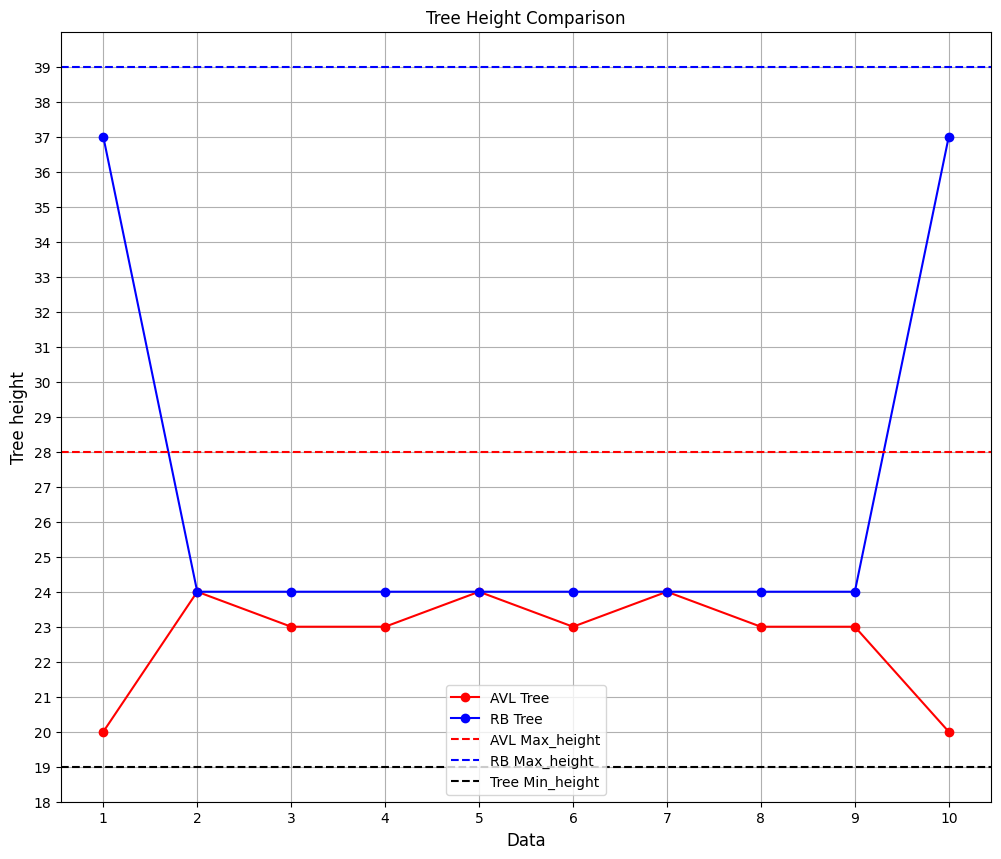

In [27]:
#Create graph
x_axis = [1,2,3,4,5,6,7,8,9,10]
fig, ax = plt.subplots(figsize=(12, 10))
#Red for AVl_tree data, Blue for RB_tree
for i in range(2):
    if i == 0:
        colr = 'red'
    if i == 1:
        colr = 'blue'
    y_axis = lst[i]
    data = {'data': x_axis,
            'height': y_axis,
           }
    df = pd.DataFrame(data)
    plt.plot(df['data'], df['height'], color= colr, marker='o')
#AVL_tree has the max height of max_avl, RB_tree has the max height of max_rb
#Both those tree has the same min height
min_h = np.floor(np.log2(10**6))
max_avl = np.floor(1.44 * np.log2(10**6))
max_rb = np.floor(2 * np.log2(10**6))

plt.axhline(y= max_avl, color='red', linestyle='--')
plt.axhline(y= max_rb, color='blue', linestyle='--')
plt.axhline(y= min_h, color='black', linestyle='--')

ax.set_xticks(x_axis)
ax.set_yticks(range(int(min_h-1), int(max_rb+1)))

plt.title('Tree Height Comparison', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Tree height', fontsize=12)
plt.legend(['AVL Tree', 'RB Tree', 'AVL Max_height', 'RB Max_height', 'Tree Min_height'])
plt.grid(True)

plt.show()
